# Section 1: Finding and Cleaning Dataset

Background: The CMS (Medicare) claims database contains real patient data for healthcare researchers to use, and they also provide a de-identified, synthetic dataset that I will use for this assignment. Data consists of patient ID, birth, death, sex, medicare benefits, and various chronic conditions histories.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk

Here, we import the data set. We rename the columns to more understandable names. We also remove those that have died to avoid NaN data, and we aggregate all medical costs into one variable. Lastly, we establish patient ID as the index, and drop data about month enrollment.

In [2]:
data1 = pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv')
data1

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,00013D2EFD8E45D1,19230501,NaN,1,1,0,26,950,12,12,...,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0
1,00016F745862898F,19430101,NaN,1,1,0,39,230,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0
2,0001FDD721E223DC,19360901,NaN,2,1,0,39,280,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00021CA6FF03E670,19410601,NaN,1,5,0,6,290,0,0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00024B3D2352D2D0,19360801,NaN,1,1,0,52,590,12,12,...,2,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0
5,0002DAE1C81CC70D,19431001,NaN,1,2,0,33,400,0,0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0002F28CE057345B,19220701,NaN,1,1,0,39,270,12,12,...,2,0.0,0.0,0.0,1010.0,270.0,0.0,3330.0,940.0,0.0
7,000308435E3E5B76,19350901,NaN,1,1,0,24,680,10,10,...,2,0.0,0.0,0.0,150.0,160.0,0.0,870.0,340.0,80.0
8,000345A39D4157C9,19760901,NaN,2,1,0,23,810,0,0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,00036A21B65B0206,19381001,NaN,2,2,0,1,570,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


limit_output extension: Maximum message size of 10000 exceeded with 28476 characters

In [3]:
data2 = data1.drop(['BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS', 'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM'], 1)
data2.columns = ['ID', 'Birth', 'Death', 'Sex', 'Race', 'EndStageRenalDisease', 'State', 'County', 'Alzheimers', 'HeartFailure', 'KidneyDisease', 'Cancer', 'COPD', 'Depression', 'Diabetes', 'HeartDisease', 'Osteoporosis', 'Arthritis', 'Stroke', 'InpatientMedicareReimbursement', 'InpatientBeneficiaryResposibility', 'InpatientPayerReimbursement', 'OutpatientMedicareReimbursement', 'OutpatientBeneficiaryResponsibility', 'OutpatientPayerReimbursement', 'CarrierMedicareReimbursement', 'CarrierBeneficiaryResponsibility', 'CarrierPayerReimbursement']
data2.index = data2.ID
data2 = data2.drop('ID', 1)
data2

,Birth,Death,Sex,Race,EndStageRenalDisease,State,County,Alzheimers,HeartFailure,KidneyDisease,...,Stroke,InpatientMedicareReimbursement,InpatientBeneficiaryResposibility,InpatientPayerReimbursement,OutpatientMedicareReimbursement,OutpatientBeneficiaryResponsibility,OutpatientPayerReimbursement,CarrierMedicareReimbursement,CarrierBeneficiaryResponsibility,CarrierPayerReimbursement
ID,,,,,,,,,,,,,,,,,,,,,
00013D2EFD8E45D1,19230501,NaN,1,1,0,26,950,2,2,2,...,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0
00016F745862898F,19430101,NaN,1,1,0,39,230,2,2,2,...,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0
0001FDD721E223DC,19360901,NaN,2,1,0,39,280,2,2,2,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00021CA6FF03E670,19410601,NaN,1,5,0,6,290,2,2,2,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00024B3D2352D2D0,19360801,NaN,1,1,0,52,590,2,2,2,...,2,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0
0002DAE1C81CC70D,19431001,NaN,1,2,0,33,400,2,2,2,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002F28CE057345B,19220701,NaN,1,1,0,39,270,2,1,1,...,2,0.0,0.0,0.0,1010.0,270.0,0.0,3330.0,940.0,0.0
000308435E3E5B76,19350901,NaN,1,1,0,24,680,2,2,2,...,2,0.0,0.0,0.0,150.0,160.0,0.0,870.0,340.0,80.0
000345A39D4157C9,19760901,NaN,2,1,0,23,810,2,2,2,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


limit_output extension: Maximum message size of 10000 exceeded with 39474 characters

In [4]:
data3 = data2
data3.iloc[:,7:18] = (2 - data3.iloc[:,7:18])
data3

,Birth,Death,Sex,Race,EndStageRenalDisease,State,County,Alzheimers,HeartFailure,KidneyDisease,...,Stroke,InpatientMedicareReimbursement,InpatientBeneficiaryResposibility,InpatientPayerReimbursement,OutpatientMedicareReimbursement,OutpatientBeneficiaryResponsibility,OutpatientPayerReimbursement,CarrierMedicareReimbursement,CarrierBeneficiaryResponsibility,CarrierPayerReimbursement
ID,,,,,,,,,,,,,,,,,,,,,
00013D2EFD8E45D1,19230501,NaN,1,1,0,26,950,0,0,0,...,0,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0
00016F745862898F,19430101,NaN,1,1,0,39,230,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0
0001FDD721E223DC,19360901,NaN,2,1,0,39,280,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00021CA6FF03E670,19410601,NaN,1,5,0,6,290,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00024B3D2352D2D0,19360801,NaN,1,1,0,52,590,0,0,0,...,0,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0
0002DAE1C81CC70D,19431001,NaN,1,2,0,33,400,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002F28CE057345B,19220701,NaN,1,1,0,39,270,0,1,1,...,0,0.0,0.0,0.0,1010.0,270.0,0.0,3330.0,940.0,0.0
000308435E3E5B76,19350901,NaN,1,1,0,24,680,0,0,0,...,0,0.0,0.0,0.0,150.0,160.0,0.0,870.0,340.0,80.0
000345A39D4157C9,19760901,NaN,2,1,0,23,810,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


limit_output extension: Maximum message size of 10000 exceeded with 39474 characters

In [5]:
data4 = data3
data4 = data4.loc[data4.loc[:,'Death'].isnull()]
data4 = data4.drop('Death',1)
data4["HealthCareCost"] = data3.iloc[:,-10:].sum(axis = 1)
data4 = data4.drop(data4.columns[-10:-1], 1)
data4[data4.loc[:,'EndStageRenalDisease'] == 'Y'] = 1
data4["Sex"] = data4["Sex"] - 1
data4

,Birth,Sex,Race,EndStageRenalDisease,State,County,Alzheimers,HeartFailure,KidneyDisease,Cancer,COPD,Depression,Diabetes,HeartDisease,Osteoporosis,Arthritis,Stroke,HealthCareCost
ID,,,,,,,,,,,,,,,,,,
00013D2EFD8E45D1,19230501,0,1,0,26,950,0,0,0,0,0,0,0,0,0,0,0,60.0
00016F745862898F,19430101,0,1,0,39,230,0,0,0,0,0,0,0,0,0,0,0,940.0
0001FDD721E223DC,19360901,1,1,0,39,280,0,0,0,0,0,0,0,0,0,0,0,0.0
00021CA6FF03E670,19410601,0,5,0,6,290,0,0,0,0,0,0,0,0,0,0,0,0.0
00024B3D2352D2D0,19360801,0,1,0,52,590,0,0,0,0,0,0,0,0,1,0,0,370.0
0002DAE1C81CC70D,19431001,0,2,0,33,400,0,0,0,0,0,0,0,0,0,0,0,0.0
0002F28CE057345B,19220701,0,1,0,39,270,0,1,1,0,0,1,1,1,0,1,0,5550.0
000308435E3E5B76,19350901,0,1,0,24,680,0,0,0,0,0,0,0,0,1,0,0,1600.0
000345A39D4157C9,19760901,1,1,0,23,810,0,0,0,0,0,0,0,0,0,0,0,0.0


limit_output extension: Maximum message size of 10000 exceeded with 23769 characters

# Elementary Data Analysis
By averaging chronic condition columns (as well as gender), we can determine the proportion of the Medicare sample that suffer from the respective chronic condition. We will therefore know which conditions afflict the largest portion of the population.

In [6]:
print(data4.mean())

Birth             1.799023e+07
Sex               5.123365e-01
Race              1.266794e+00
State             2.393567e+01
County            3.394544e+02
Alzheimers        2.313992e-01
HeartFailure      3.071033e-01
KidneyDisease     1.779759e-01
Cancer            1.240724e-01
COPD              1.779148e-01
Depression        2.514100e-01
Diabetes          3.929089e-01
HeartDisease      4.333584e-01
Osteoporosis      2.211231e-01
Arthritis         2.011123e-01
Stroke            1.046901e-01
HealthCareCost    3.589788e+03
dtype: float64


We can see that 23% of patients suffer from Alzheimers, 31% Heart Failure, 18% Kidney Disease, 12% Cancer, 18% COPD, 25% Depression, 39% Diabetes, 43% Heart Disease, 22% Osteoporosis, 20% Arthritis, 10% Stroke.

# Special Pandas
We can groupby presence of chronic conditions and apply the standard deviation function on the cost of medical care to determine which chronic conditions vary the most in treatment and which chronic conditions have consistent treatment.

In [7]:
for chronic_condition in data4.columns[6:-1]:
    print(chronic_condition, data4.groupby(by = chronic_condition).std()['HealthCareCost'].iloc[1])

Alzheimers 13032.394393744878
HeartFailure 13350.589772750292
KidneyDisease 15904.244211702082
Cancer 12832.887273743328
COPD 15126.026842185101
Depression 12292.962028297574
Diabetes 11979.862045597962
HeartDisease 12025.775482058349
Osteoporosis 10970.36907699371
Arthritis 11985.404069825441
Stroke 13546.272003585333


Treatment for Kidney Disease varies the most in Healthcare Costs, most likely due to the variation of treatment dependent on the severity of the Kidney Disease.

# Matplotlib
We will see if there is a correlation between age and cost of healthcare. First, we need to calculate age (Data collected by 12-31-2008) and drop births of 1.

ID
00013D2EFD8E45D1    85.670089
00016F745862898F    65.998631
0001FDD721E223DC    72.331280
00021CA6FF03E670    67.583847
00024B3D2352D2D0    72.416153
0002DAE1C81CC70D    65.251198
0002F28CE057345B    86.502396
000308435E3E5B76    73.333333
000345A39D4157C9    32.331280
00036A21B65B0206    70.250513
000489E7EAAD463F    74.913073
00048EF1F4791C68    79.583847
0004F0ABD505251D    72.501027
00052705243EA128    74.669405
00070B63745BE497    72.835044
0007E57CC13CE880    74.997947
0007F12A492FD25D    89.333333
000A005BA0BED3EA    89.251198
000B97BA2314E971    70.751540
000C7486B11E7030    76.416153
000D6D88463D8A76    66.417522
000DDD364C46E2C6    76.501027
000E374862A3C527    77.837098
00108066CA1FACCE    43.750856
0010D6F80D245D62    69.084189
0011714C14B52EEB    68.750171
0011CB1FE23E91AF    71.249829
0012AFEEC379A69D    70.751540
00131C35661B2926    49.166324
00139C345A104F72    86.250513
                      ...    
FFF151182CF0169D    66.250513
FFF1A741EFDC4507    57.503080
FFF1CD7

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


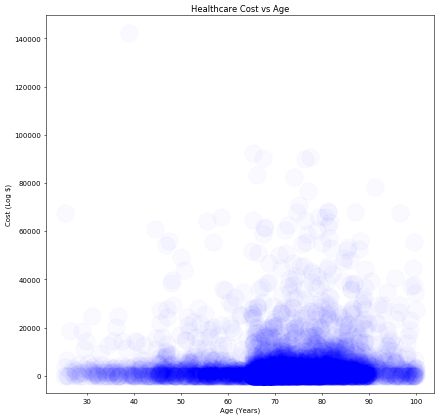

In [8]:
data5 = data4[data4.loc[:,'Birth'] != 1]
data5['Age'] = (pd.datetime(2008, 12, 31) - pd.to_datetime(data5.loc[:,'Birth'], format='%Y%m%d')).astype('timedelta64[D]')/365.25
print(data5['Age'])
fig = plt.figure(figsize=(10,10),dpi=50)
plt.title('Healthcare Cost vs Age')
plt.ylabel('Cost (Log $)')
plt.xlabel('Age (Years)')
# We will only plot 5000 points
plt.plot(data5['Age'].iloc[:5000], data5['HealthCareCost'].iloc[:5000], 'o', color = (0,0,1,.025), markeredgecolor = (0,0,1,.025), markersize = 25)

It seems that younger beneficiaries have lower healthcare costs, and there is a major hike in quantity of beneficiaries at age 65 and above as well as a hike in costs. This is likely due to the ability to enroll in Medicare at 65. If i was an insurance adjuster, I'd prepare higher rates for those 65 and above due to their elevated risk in comparison to those under 65.

# Seaborn

/home/ubuntu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


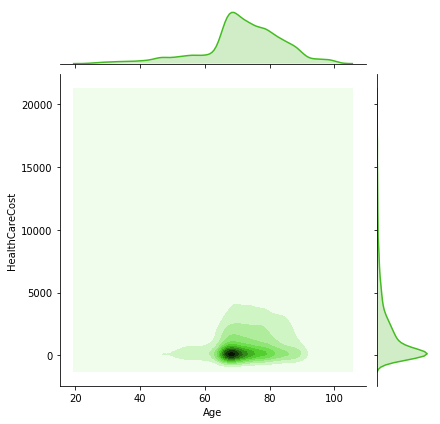

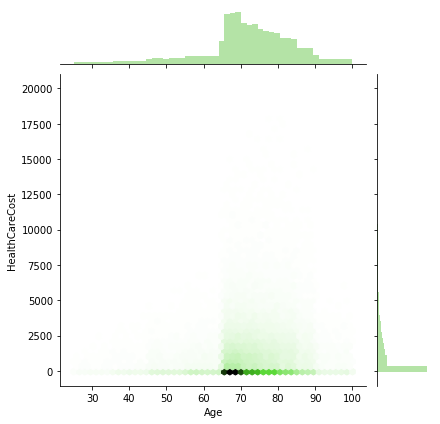

In [9]:
import seaborn as sns
data6 = data5.loc[data5['HealthCareCost'] < 20000,:]
sns.jointplot(data6['Age'].iloc[:5000], data6['HealthCareCost'].iloc[:5000], kind="kde", color="#44BB22")
sns.jointplot(data6['Age'], data6['HealthCareCost'], kind="hex", color="#44BB22")

Seaborn allows the creation of a heatmap/Kernel Density Estimate from individual data points rather than a matrix of pixel densities (KDE is only available in Seaborn). Seaborn also allows extremely easy generation of frequency graphs of Healthcare Cost and Age on the sides of the heatmap (this is still possible in matplot, but would take way too long to program). This allows a better visual of the distribution of healthcare cost and shows pretty well the increase of patients after age 65. The hex setting of seaborn's plots also allows extremely quick graphing of all data points (All 100000 points on seaborn vs 5000 points on matplotlib).

# Sklearn
I have converted all my data to quantitative data, allowing us to perform a linear regression on patient data. I have split my patient records into training and testing using the train_test_split function, and I also calculated the mean_squared_error to analyze the performance of my training.

In [12]:
from sklearn.linear_model import LinearRegression
X = data5.drop('HealthCareCost',1)
Y = data5['HealthCareCost']
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X,Y)
reg = LinearRegression().fit(train_X,train_Y)
predict_Y = reg.predict(test_X)
from sklearn.metrics import mean_squared_error
print('Mean Squared Error',mean_squared_error(predict_Y, test_Y))
print('Testing Score', reg.score(test_X,test_Y))
print('Training Score', reg.score(train_X,train_Y))
print('Some example predictions')
for a,b in zip(test_Y[:40], predict_Y[:40]):
    print('Actual: ',a, 'Predicted: ',b)
# print('Score:',reg.score(X,Y))
print('Coefficients')
for a,b in zip(reg.coef_, X.columns):
    print(b,a)

Mean Squared Error 49227873.2774491
Testing Score 0.3700238924500115
Training Score 0.3709617708754618
Some example predictions
Actual:  0.0 Predicted:  -178.95534503358238
Actual:  1810.0 Predicted:  7828.658820255065
Actual:  2114.0 Predicted:  8609.11592225283
Actual:  0.0 Predicted:  -174.70585916972288
Actual:  300.0 Predicted:  2477.9323827278154
Actual:  0.0 Predicted:  53.58240405236802
Actual:  1400.0 Predicted:  2096.7429702002646
Actual:  2050.0 Predicted:  13596.613339370213
Actual:  0.0 Predicted:  -82.61833281238899
Actual:  5000.0 Predicted:  4025.4580931090613
Actual:  660.0 Predicted:  489.9486539876941
Actual:  8274.0 Predicted:  7155.375825186411
Actual:  0.0 Predicted:  140.51875010381696
Actual:  90.0 Predicted:  -86.92861131889549
Actual:  7960.0 Predicted:  4645.532659762124
Actual:  440.0 Predicted:  600.3099309822633
Actual:  2120.0 Predicted:  3061.6923020571558
Actual:  70.0 Predicted:  1961.7517435963532
Actual:  3520.0 Predicted:  1098.9134157772405
Actual:

The mean squared error of the linear regression prediction averaged around 5 million. That is not bad for an insurance company to predict rates for users within 2 to 3 thousand of the actual amount. If a quick analysis is needed, this is the way to go. The model takes into consideration age, sex, and especially medical history when predicting total health care costs. This would provide us a ballpark evaluation for future customers when they buy insurance plans. However, if an in-depth analysis for an insurance rate is necessary, it would be beneficial to have more quantitative measures rather than a 0 or 1 for the presence of a chronic condition. In addition, location is also a factor that cannot be accounted for in machine learning algorithms unless we resort to quantitative measures such as latitude/longitude.